In [1]:
import os

os.chdir(r'C:\Users\carlo\GitHub\ProjectBuffalo')

In [2]:
import pandas as pd
import numpy as np
import buffalo.algorithm.outliers as ol_algo 
import torch

In [3]:
import matplotlib.pyplot as plt

## Apple Outlier Detection

In [4]:
import pickle

df = pickle.load(open('cached_data/target_stock.pickle', 'rb'))

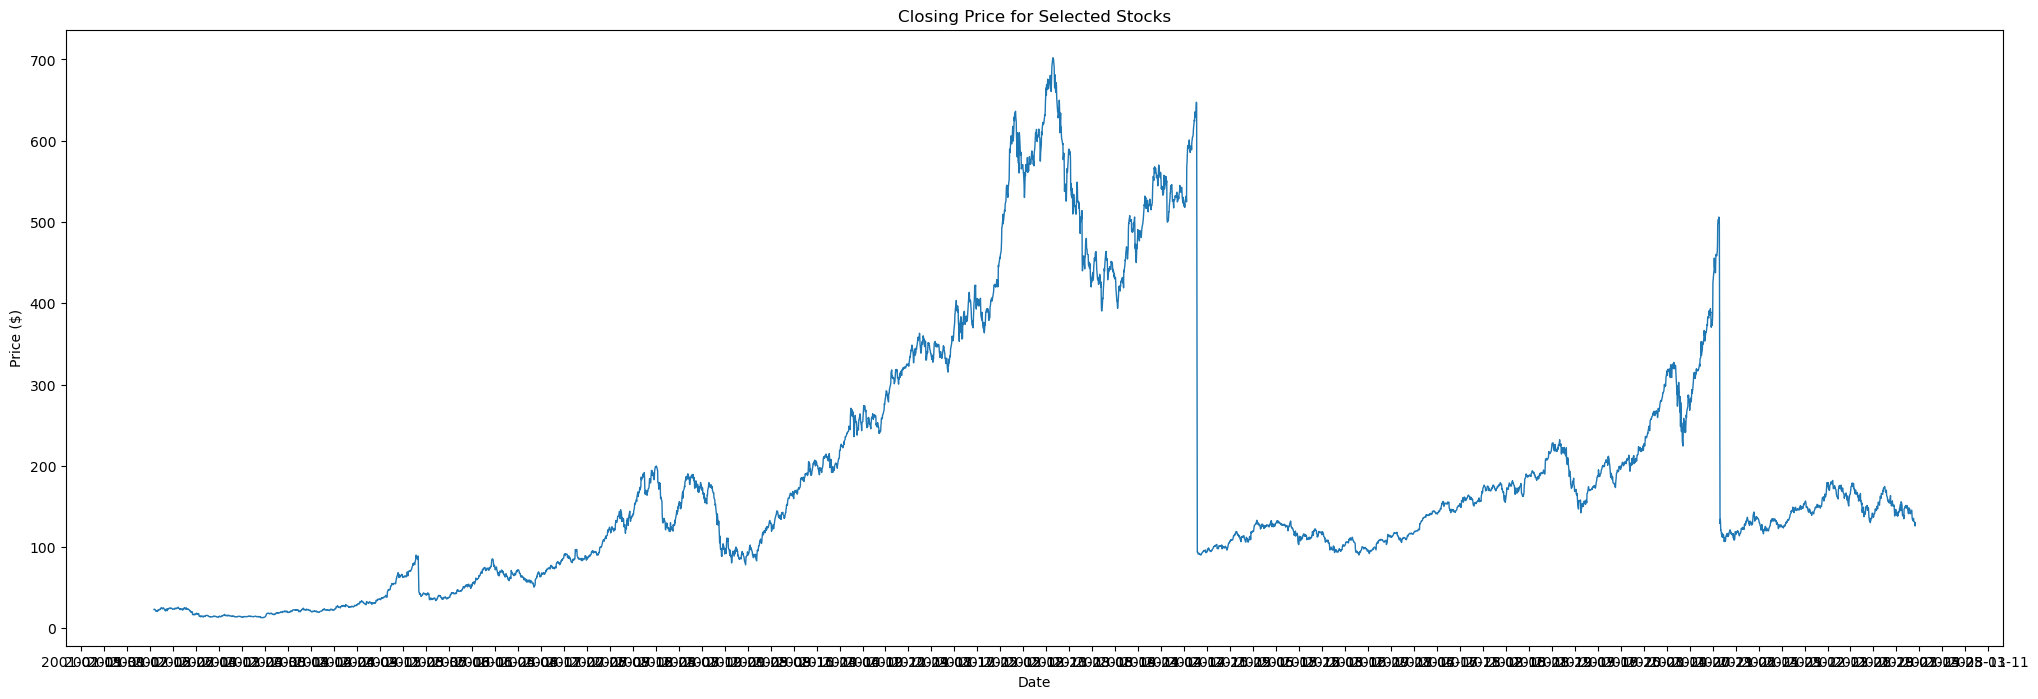

In [5]:
# Plot the closing price for each stock
import matplotlib.dates as mdates
# set the interval to show every 7th day
interval = 100

fig, ax = plt.subplots(figsize=(25, 8))
ax.plot(df.index, df['close'], linewidth=1)
ax.set_title('Closing Price for Selected Stocks')
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')

# set the x-axis interval
ax.xaxis.set_major_locator(mdates.DayLocator(interval=interval))

plt.show()

In [8]:
## Get LSTM residuasl
lstm_model = torch.load(r'cached_data/lstm_2lr_64hi_2do.pth')
resid = lstm_model.train_resid

c:\Users\carlo\miniconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


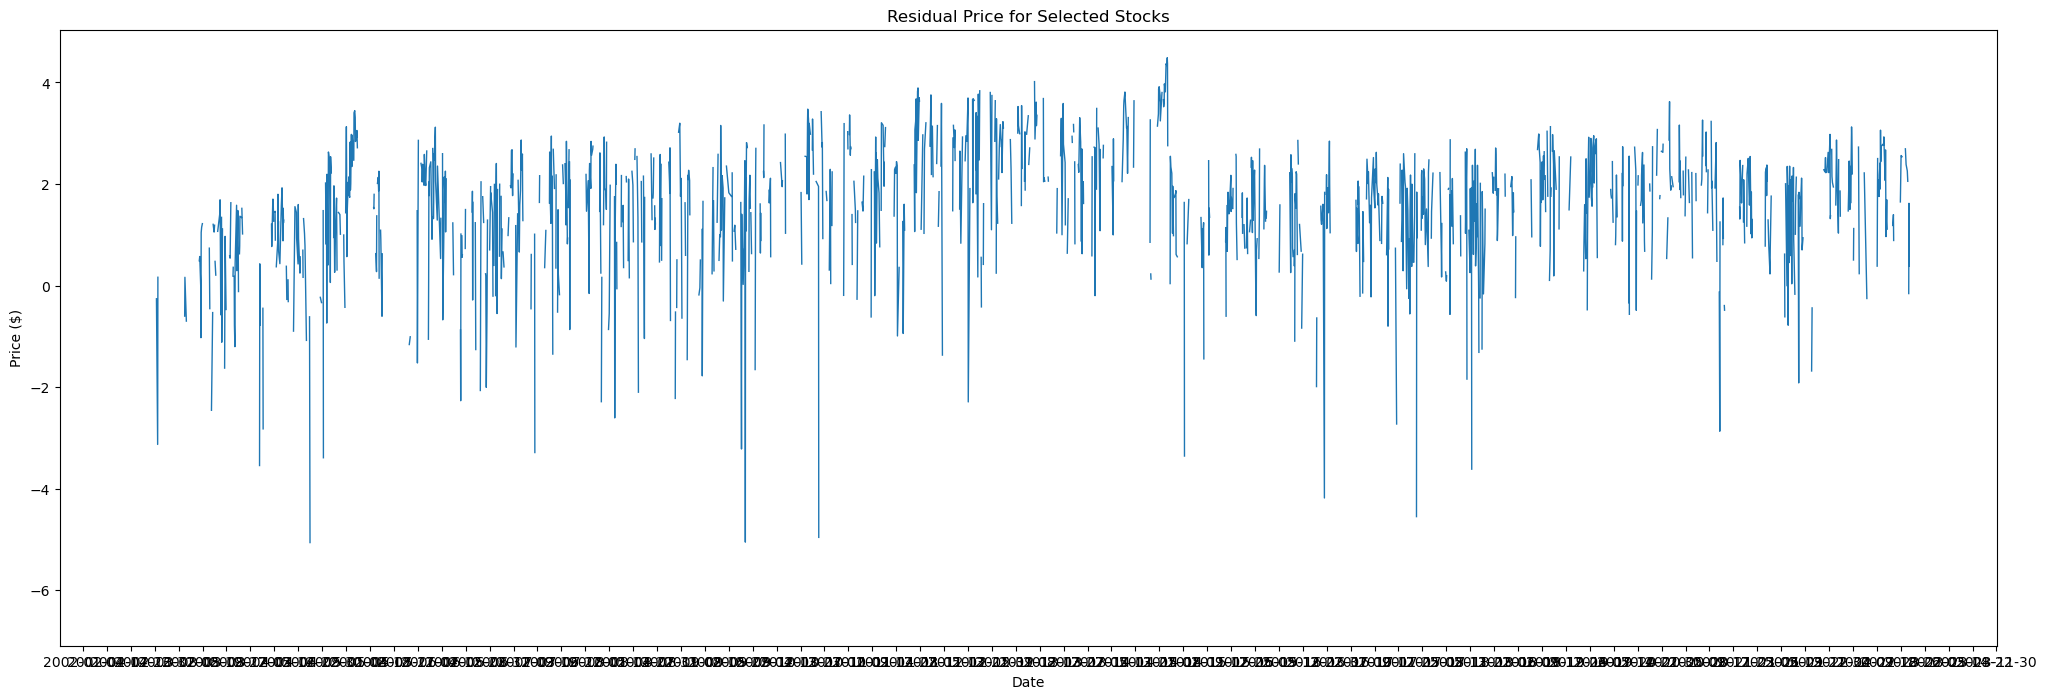

In [22]:
fig, ax = plt.subplots(figsize=(25, 8))
ax.plot(df.index[resid.index.astype(int)], np.log(resid), linewidth=1)
ax.set_title('Residual Price for Selected Stocks')
ax.set_xlabel('Date')

ax.set_ylabel('Price ($)')

# set the x-axis interval
ax.xaxis.set_major_locator(mdates.DayLocator(interval=interval))

plt.show()

In [ ]:
ol_detection = ol_algo.IterativeTtestOutlierDetection(
    types= pd.DataFrame({'type': ['AO']}),
    maxit=2,
    maxit_iloop=4,
    maxit_oloop=4,
    cval=None,
    cval_reduce=0.14286,
    discard_method='bottom-up',
    discard_cval=None,
    tsmethod='ARIMA',
    args_tsmethod={
        "order": (1,0,1),
        "seasonal_order": (0, 0, 0, 0),
        "with_intercept": False
    }
)

In [ ]:
result_appl, endog_appl, exog_appl = ol_detection.fit(endog=df['close'], exog=None)

In [ ]:
result = result.reset_index(drop=True)
result

In [ ]:
fig, axs = plt.subplots(2,1,figsize=(20,10), gridspec_kw={'height_ratios': [1, 1]})
fig.suptitle('Outlier Effect for APPL', size=20)
axs[0].plot(ol_obs, linewidth=1, label = 'Original Series')
axs[0].plot(endog, linewidth=1, label = 'Adjusted Series')
axs[0].scatter(result['t_index'], result['residuals'], c=result.id, cmap='tab10',  marker='o', s=15)
for i, txt in enumerate(result['id']):
    axs[0].annotate(txt, (result['t_index'][i]+15, result['residuals'][i]), fontsize=9)
axs[0].get_xaxis().set_visible(False)
axs[0].legend(loc='upper left', prop={'size': 13})

outlier_effect =  ol_obs - endog
axs[1].plot((outlier_effect), c='r', label = 'Outlier Effect')
axs[1].legend(loc='upper left', prop={'size': 13})
plt.subplots_adjust(wspace=0, hspace=0)